In [1]:
from glob import glob 
import os, cv2, shutil
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
main = 'dataset'
training_path = os.path.join(main, 'train/')
testing_path = os.path.join(main, 'test/')
validation_path = os.path.join(main, 'valid/')
training_path, testing_path, validation_path

('dataset/train/', 'dataset/test/', 'dataset/valid/')

In [3]:
class_images = {}

def determine_class_from_filename(filename):
    return filename.split('_')[0] 

def img(path):
    for filename in os.listdir(path):
        class_name = determine_class_from_filename(filename)
        if class_name not in class_images:
            class_images[class_name] = []
        class_images[class_name].append(filename)

    for class_name, filenames in class_images.items():
        class_dir = os.path.join(path, class_name)
        os.makedirs(class_dir, exist_ok=True)
        for filename in filenames:
            src_path = os.path.join(path, filename)
            dest_path = os.path.join(class_dir, filename)
            shutil.move(src_path, dest_path)

    print("Images organized into subdirectories based on class names.")

In [4]:
training_images = glob(training_path + '/*/*.jpg')
testing_images = glob(testing_path + '/*/*.jpg')
validation_images = glob(validation_path + '/*.jpg')

In [5]:
len(training_images), len(testing_images)

(251, 68)

In [6]:
def rename_images_in_directory(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):  # Adjust the file extension as needed
            # Split the filename to remove the suffix
            new_filename = filename.split(".")[0] + ".jpg"
            # Construct the full paths
            old_path = os.path.join(directory, filename)
            new_path = os.path.join(directory, new_filename)
            # Rename the file
            os.rename(old_path, new_path)
            print(f"Renamed: {filename} -> {new_filename}")


In [7]:
try:
    rename_images_in_directory(training_path)
    rename_images_in_directory(testing_path)
except Exception as e:
    print(e)

In [7]:
os.listdir(training_path)

['anomaly', '.DS_Store', 'normal']

In [8]:
gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,           # Rescale pixel values to [0, 1]
    rotation_range=20,        # Random rotation in the range [-20, 20] degrees
    width_shift_range=0.2,    # Random horizontal shift by up to 20% of the image width
    height_shift_range=0.2,   # Random vertical shift by up to 20% of the image height
    shear_range=0.2,          # Shear intensity in the range [-0.2, 0.2]
    zoom_range=0.2,           # Random zoom by up to 20%
    horizontal_flip=True,     # Random horizontal flip
    fill_mode='nearest' 
)

In [9]:
IMAGE_SHAPE = [128, 128]

train_gen = gen.flow_from_directory(
    training_path,
    target_size=IMAGE_SHAPE,
    batch_size=64,
    shuffle=True
    # classes=['anomaly', 'normal'],
    # class_mode='binary'
)

Found 251 images belonging to 2 classes.


In [10]:
test_gen = gen.flow_from_directory(
    testing_path,
    target_size=IMAGE_SHAPE,
    batch_size=64
)

Found 68 images belonging to 2 classes.


In [18]:
ptm = tf.keras.applications.vgg16.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=IMAGE_SHAPE+[3],
)
ptm.trainable = False
x = tf.keras.layers.Flatten()(ptm.output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(2, activation='softmax')(x)

In [20]:
model = tf.keras.models.Model(inputs=ptm.inputs, outputs=x)

model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
r = model.fit(train_gen, validation_data=test_gen, epochs=20)

Epoch 1/20
4/4 [==============================] - 11s 3s/step - loss: 1.1600 - accuracy: 0.6892 - val_loss: 1.6952 - val_accuracy: 0.4265
Epoch 2/20
4/4 [==============================] - 9s 2s/step - loss: 0.9185 - accuracy: 0.7131 - val_loss: 0.6648 - val_accuracy: 0.7059
Epoch 3/20
4/4 [==============================] - 9s 2s/step - loss: 0.6141 - accuracy: 0.7689 - val_loss: 0.4222 - val_accuracy: 0.8971
Epoch 4/20
4/4 [==============================] - 9s 2s/step - loss: 0.6006 - accuracy: 0.7610 - val_loss: 0.3993 - val_accuracy: 0.8088
Epoch 5/20
4/4 [==============================] - 9s 2s/step - loss: 0.4956 - accuracy: 0.7490 - val_loss: 1.0461 - val_accuracy: 0.4706
Epoch 6/20
4/4 [==============================] - 9s 2s/step - loss: 0.5148 - accuracy: 0.7410 - val_loss: 0.3855 - val_accuracy: 0.8088
Epoch 7/20
4/4 [==============================] - 10s 2s/step - loss: 0.4340 - accuracy: 0.7968 - val_loss: 0.2518 - val_accuracy: 0.9118
Epoch 8/20
4/4 [=======================

In [23]:
def graphplotting(v1, v2):
    plt.plot(r.history[v1], label=v1)
    plt.plot(r.history[v2], label=v2)
    plt.title(f'{v1} per epoch graph')
    plt.ylabel(v1)
    plt.xlabel('epoch')
    plt.legend()
    plt.grid('off')
    plt.show();

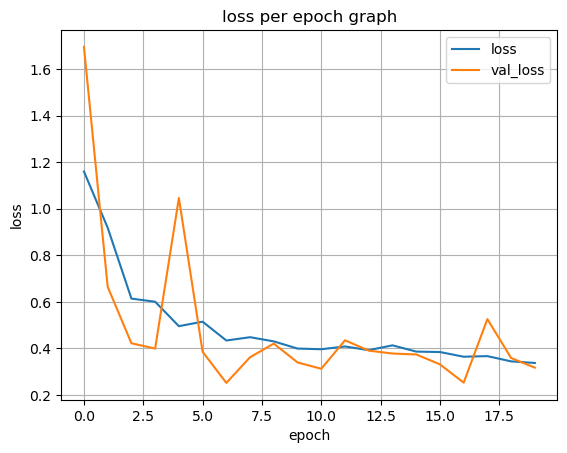

In [24]:
graphplotting('loss', 'val_loss')

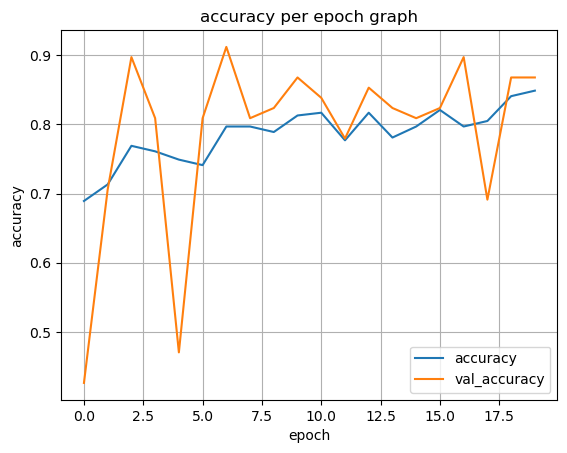

In [25]:
graphplotting('accuracy', 'val_accuracy')

In [18]:
testing_images

['dataset/test/anomaly/IMG_2189_MOV-20_jpg.jpg',
 'dataset/test/anomaly/IMG_2205_MOV-44_jpg.jpg',
 'dataset/test/anomaly/IMG_2189_MOV-29_jpg.jpg',
 'dataset/test/anomaly/IMG_2191_MOV-6_jpg.jpg',
 'dataset/test/anomaly/IMG_2189_MOV-0_jpg.jpg',
 'dataset/test/anomaly/IMG_2205_MOV-0_jpg.jpg',
 'dataset/test/anomaly/IMG_2191_MOV-23_jpg.jpg',
 'dataset/test/anomaly/IMG_2191_MOV-41_jpg.jpg',
 'dataset/test/anomaly/IMG_2191_MOV-31_jpg.jpg',
 'dataset/test/anomaly/IMG_2205_MOV-47_jpg.jpg',
 'dataset/test/anomaly/IMG_2205_MOV-31_jpg.jpg',
 'dataset/test/anomaly/IMG_2191_MOV-25_jpg.jpg',
 'dataset/test/anomaly/IMG_2205_MOV-53_jpg.jpg',
 'dataset/test/anomaly/IMG_2191_MOV-8_jpg.jpg',
 'dataset/test/anomaly/IMG_2205_MOV-52_jpg.jpg',
 'dataset/test/anomaly/IMG_2205_MOV-16_jpg.jpg',
 'dataset/test/anomaly/IMG_2191_MOV-19_jpg.jpg',
 'dataset/test/anomaly/IMG_2205_MOV-82_jpg.jpg',
 'dataset/test/anomaly/IMG_2189_MOV-12_jpg.jpg',
 'dataset/test/anomaly/IMG_2205_MOV-76_jpg.jpg',
 'dataset/test/anomaly/I